# Heart Disease Prediction 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In this project we use 3 different algorithms 

KNN Classifier

Decision Tree Classifier

Random Forest Classifier

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
df = pd.read_csv("D:/PROJECT/Heart Disease Prediction/Heart-Disease-Prediction/heart_attack_prediction_dataset.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [9]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


## Feature Selection


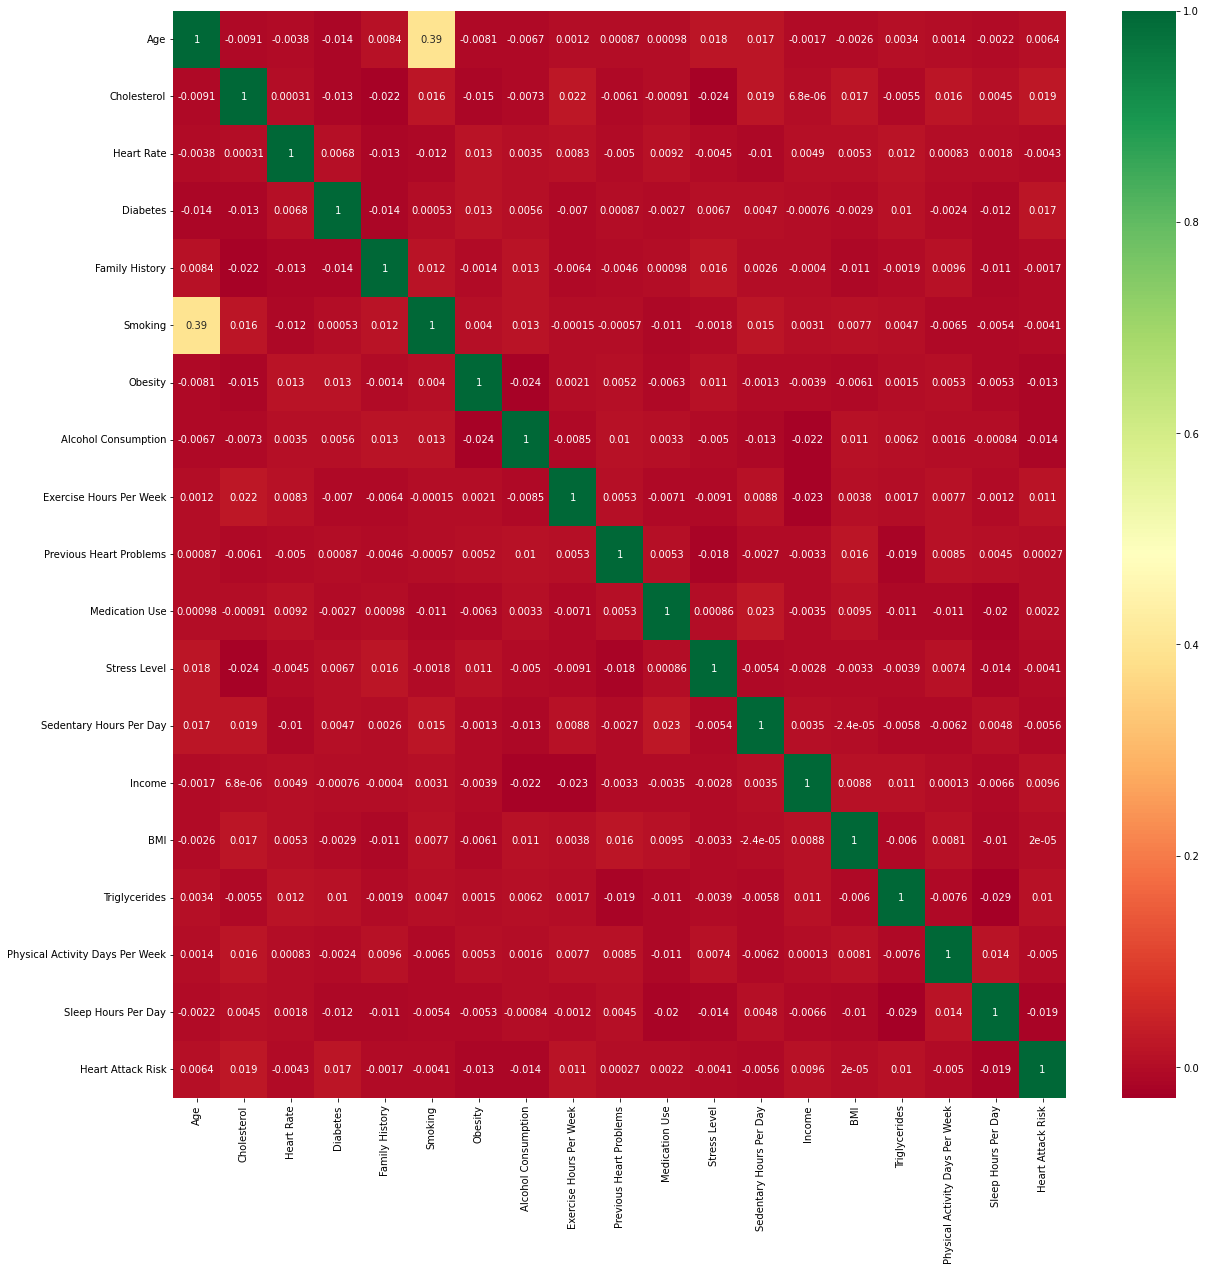

In [14]:
import seaborn as sns
#fet correlation of each features in dataset
correlation = df.corr()
top_cor_features = correlation.index
plt.figure(figsize=(20,20))
g= sns.heatmap(df[top_cor_features].corr(), annot=True,cmap="RdYlGn")

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'Heart Rate'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Family History'}>,
        <AxesSubplot:title={'center':'Smoking'}>,
        <AxesSubplot:title={'center':'Obesity'}>,
        <AxesSubplot:title={'center':'Alcohol Consumption'}>],
       [<AxesSubplot:title={'center':'Exercise Hours Per Week'}>,
        <AxesSubplot:title={'center':'Previous Heart Problems'}>,
        <AxesSubplot:title={'center':'Medication Use'}>,
        <AxesSubplot:title={'center':'Stress Level'}>],
       [<AxesSubplot:title={'center':'Sedentary Hours Per Day'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Triglycerides'}>],
       [<AxesSubplot:title={'center':'Physical Activity Days Per Week'}>,
        <AxesSubplot:title={'center':'

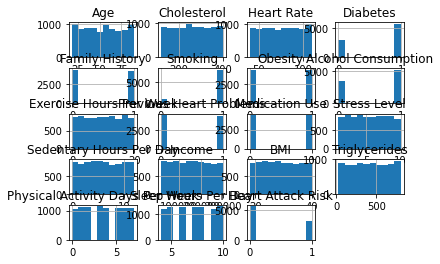

In [15]:
df.hist()

<AxesSubplot:xlabel='Heart Attack Risk', ylabel='count'>

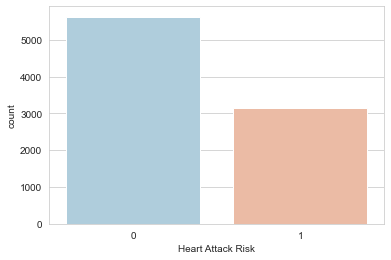

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Heart Attack Risk', data=df, palette='RdBu_r')

## Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummyvariables 
and scale all the values before training the Machine Learning Models.
First, we use "get_dummies" method to create dummy columns for categorical variables 